<a href="https://colab.research.google.com/github/brunadsfreitas/Spotify-Track-Dataset/blob/main/Spotify_Tracks_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Spotify music's analysis**

The goal is to explore Spotify data available on https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download to, by the end of the analysis, forecast the success of a song applying machine learning concepts.

In [ ]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/dataset.csv')

Initial exploration, seeing the first 5 lines to know the dataset

In [ ]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.shape

(114000, 21)

Finding missing data

In [ ]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Checking where the missing data is

In [ ]:
df[df.isnull().any(axis = 1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Deleting missing data

In [ ]:
df=df.drop(65900)

Deleting unknow column

In [ ]:
df = df.drop(columns = ['Unnamed: 0'])

In [ ]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Checking the statistics again

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,113999.0,33.238827,22.304959,0.000,17.0000,35.000000,50.0000,100.000
duration_ms,113999.0,228031.153387,107296.057716,8586.000,174066.0000,212906.000000,261506.0000,5237295.000
danceability,113999.0,0.566801,0.173543,0.000,0.4560,0.580000,0.6950,0.985
energy,113999.0,0.641383,0.251530,0.000,0.4720,0.685000,0.8540,1.000
key,113999.0,5.309126,3.559999,0.000,2.0000,5.000000,8.0000,11.000
loudness,113999.0,-8.258950,5.029357,-49.531,-10.0130,-7.004000,-5.0030,4.532
mode,113999.0,0.637558,0.480708,0.000,0.0000,1.000000,1.0000,1.000
speechiness,113999.0,0.084652,0.105733,0.000,0.0359,0.048900,0.0845,0.965
acousticness,113999.0,0.314907,0.332522,0.000,0.0169,0.169000,0.5975,0.996
instrumentalness,113999.0,0.156051,0.309556,0.000,0.0000,0.000042,0.0490,1.000


A record longer than 87 minutes seems strange, so let's take a look.

In [ ]:
df.loc[df['duration_ms'] == 5237295.000]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
73617,3Cnz3Bu9Wcw8p3kiBTXTxp,Tale Of Us,Unity (Voyage Mix),Unity (Voyage Mix) Pt. 1,35,5237295,False,0.695,0.736,5,-11.371,0,0.0374,0.00399,0.86,0.091,0.0509,124.001,4,minimal-techno


Searching on the internet the record exists:
https://open.spotify.com/track/3Cnz3Bu9Wcw8p3kiBTXTxp?autoplay=true

And it's as long as the record, so that's fine.

Comparing the values ​​for each column, there are no outliers or missing data anymore.
Let's dig a little deeper into duplicate values.
Since different songs can have the same name, to ensure that the duplicate value is from the same song, we'll create a key by concatenating artist, album_name and track_name.

In [ ]:
df['union'] = df['artists'] + df['album_name'] + df['track_name']
df.head()


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,union
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Gen HoshinoComedyComedy
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Ben WoodwardGhost (Acoustic)Ghost - Acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Ingrid Michaelson;ZAYNTo Begin AgainTo Begin A...
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Kina GrannisCrazy Rich Asians (Original Motion...
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Chord OverstreetHold OnHold On


In [ ]:
df.union.value_counts()

Jimmy Eat WorldAlternative Christmas 2022Last Christmas                                          12
The Smashing PumpkinsAlternative Christmas 2022Christmastime                                     10
BadfingerStraight Up (Remastered 2010 / Deluxe Edition)Baby Blue - Remastered 2010                9
Don McLeanBest 70s Rock TunesIf We Try                                                            9
Jimmy BuffettBest 70s Rock TunesSurvive                                                           9
                                                                                                 ..
Böhse OnkelzSchwarzWorte der Freiheit                                                             1
Sean Finn;Amanda WilsonHouse Residence, Vol. 4For Tonight - Radio Edit                            1
Sean Finn;Dj Kone & Marc Palacios;Earth n DaysAmsterdam Night FeverOutro - Earth n Days Remix     1
Paul GerlingerVon vorne anfangenVon vorne anfangen                                                1


In [ ]:
# Checking duplicate values:
test = df.union.value_counts()
count = 0
for t in test:
  if t > 1 :
    count = count + t -1

print(count)  

24620


There are 24620 duplicates, so now we will take a look at the 3 first to understand the duplicity

In [ ]:
df.loc[df['union'] == 'Jimmy Eat WorldAlternative Christmas 2022Last Christmas']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,union
2230,2S9yxu8MLsL0CXoSdGuues,Jimmy Eat World,Alternative Christmas 2022,Last Christmas,0,267493,False,0.532,0.842,2,...,1,0.0403,0.00131,0.000001,0.33,0.715,126.042,4,alt-rock,Jimmy Eat WorldAlternative Christmas 2022Last ...
2231,6vMAhCWv2XzOqXj6pYTh5H,Jimmy Eat World,Alternative Christmas 2022,Last Christmas,0,267493,False,0.532,0.842,2,...,1,0.0403,0.00131,0.000001,0.33,0.715,126.042,4,alt-rock,Jimmy Eat WorldAlternative Christmas 2022Last ...
3435,2S9yxu8MLsL0CXoSdGuues,Jimmy Eat World,Alternative Christmas 2022,Last Christmas,0,267493,False,0.532,0.842,2,...,1,0.0403,0.00131,0.000001,0.33,0.715,126.042,4,alternative,Jimmy Eat WorldAlternative Christmas 2022Last ...
3437,6vMAhCWv2XzOqXj6pYTh5H,Jimmy Eat World,Alternative Christmas 2022,Last Christmas,0,267493,False,0.532,0.842,2,...,1,0.0403,0.00131,0.000001,0.33,0.715,126.042,4,alternative,Jimmy Eat WorldAlternative Christmas 2022Last ...
33097,2S9yxu8MLsL0CXoSdGuues,Jimmy Eat World,Alternative Christmas 2022,Last Christmas,0,267493,False,0.532,0.842,2,...,1,0.0403,0.00131,0.000001,0.33,0.715,126.042,4,emo,Jimmy Eat WorldAlternative Christmas 2022Last ...
33099,6vMAhCWv2XzOqXj6pYTh5H,Jimmy Eat World,Alternative Christmas 2022,Last Christmas,0,267493,False,0.532,0.842,2,...,1,0.0403,0.00131,0.000001,0.33,0.715,126.042,4,emo,Jimmy Eat WorldAlternative Christmas 2022Last ...
82015,6vMAhCWv2XzOqXj6pYTh5H,Jimmy Eat World,Alternative Christmas 2022,Last Christmas,0,267493,False,0.532,0.842,2,...,1,0.0403,0.00131,0.000001,0.33,0.715,126.042,4,power-pop,Jimmy Eat WorldAlternative Christmas 2022Last ...
82023,2S9yxu8MLsL0CXoSdGuues,Jimmy Eat World,Alternative Christmas 2022,Last Christmas,0,267493,False,0.532,0.842,2,...,1,0.0403,0.00131,0.000001,0.33,0.715,126.042,4,power-pop,Jimmy Eat WorldAlternative Christmas 2022Last ...
85021,6vMAhCWv2XzOqXj6pYTh5H,Jimmy Eat World,Alternative Christmas 2022,Last Christmas,0,267493,False,0.532,0.842,2,...,1,0.0403,0.00131,0.000001,0.33,0.715,126.042,4,punk-rock,Jimmy Eat WorldAlternative Christmas 2022Last ...
85025,2S9yxu8MLsL0CXoSdGuues,Jimmy Eat World,Alternative Christmas 2022,Last Christmas,0,267493,False,0.532,0.842,2,...,1,0.0403,0.00131,0.000001,0.33,0.715,126.042,4,punk-rock,Jimmy Eat WorldAlternative Christmas 2022Last ...


In [ ]:
df.loc[df['union'] == 'The Smashing PumpkinsAlternative Christmas 2022Christmastime']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,union
2082,0PSKFp3zoNmJzDsOHeLV6l,The Smashing Pumpkins,Alternative Christmas 2022,Christmastime,0,196723,False,0.165,0.434,0,...,1,0.0288,0.316,0.171,0.213,0.186,77.983,3,alt-rock,The Smashing PumpkinsAlternative Christmas 202...
2085,4fdy3vg2bCXU6L77vC6li8,The Smashing Pumpkins,Alternative Christmas 2022,Christmastime,0,196723,False,0.165,0.434,0,...,1,0.0288,0.316,0.171,0.213,0.186,77.983,3,alt-rock,The Smashing PumpkinsAlternative Christmas 202...
3129,0PSKFp3zoNmJzDsOHeLV6l,The Smashing Pumpkins,Alternative Christmas 2022,Christmastime,0,196723,False,0.165,0.434,0,...,1,0.0288,0.316,0.171,0.213,0.186,77.983,3,alternative,The Smashing PumpkinsAlternative Christmas 202...
3138,4fdy3vg2bCXU6L77vC6li8,The Smashing Pumpkins,Alternative Christmas 2022,Christmastime,0,196723,False,0.165,0.434,0,...,1,0.0288,0.316,0.171,0.213,0.186,77.983,3,alternative,The Smashing PumpkinsAlternative Christmas 202...
44045,0PSKFp3zoNmJzDsOHeLV6l,The Smashing Pumpkins,Alternative Christmas 2022,Christmastime,0,196723,False,0.165,0.434,0,...,1,0.0288,0.316,0.171,0.213,0.186,77.983,3,grunge,The Smashing PumpkinsAlternative Christmas 202...
44047,4fdy3vg2bCXU6L77vC6li8,The Smashing Pumpkins,Alternative Christmas 2022,Christmastime,0,196723,False,0.165,0.434,0,...,1,0.0288,0.316,0.171,0.213,0.186,77.983,3,grunge,The Smashing PumpkinsAlternative Christmas 202...
71140,4fdy3vg2bCXU6L77vC6li8,The Smashing Pumpkins,Alternative Christmas 2022,Christmastime,0,196723,False,0.165,0.434,0,...,1,0.0288,0.316,0.171,0.213,0.186,77.983,3,metal,The Smashing PumpkinsAlternative Christmas 202...
71145,0PSKFp3zoNmJzDsOHeLV6l,The Smashing Pumpkins,Alternative Christmas 2022,Christmastime,0,196723,False,0.165,0.434,0,...,1,0.0288,0.316,0.171,0.213,0.186,77.983,3,metal,The Smashing PumpkinsAlternative Christmas 202...
91539,4fdy3vg2bCXU6L77vC6li8,The Smashing Pumpkins,Alternative Christmas 2022,Christmastime,0,196723,False,0.165,0.434,0,...,1,0.0288,0.316,0.171,0.213,0.186,77.983,3,rock,The Smashing PumpkinsAlternative Christmas 202...
91540,0PSKFp3zoNmJzDsOHeLV6l,The Smashing Pumpkins,Alternative Christmas 2022,Christmastime,0,196723,False,0.165,0.434,0,...,1,0.0288,0.316,0.171,0.213,0.186,77.983,3,rock,The Smashing PumpkinsAlternative Christmas 202...


In [ ]:
df.loc[df['union'] == 'BadfingerStraight Up (Remastered 2010 / Deluxe Edition)Baby Blue - Remastered 2010']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,union
8315,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,...,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues,BadfingerStraight Up (Remastered 2010 / Deluxe...
19759,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,...,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,country,BadfingerStraight Up (Remastered 2010 / Deluxe...
34728,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,...,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,folk,BadfingerStraight Up (Remastered 2010 / Deluxe...
62226,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,...,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-pop,BadfingerStraight Up (Remastered 2010 / Deluxe...
63087,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,...,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-rock,BadfingerStraight Up (Remastered 2010 / Deluxe...
82064,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,...,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,power-pop,BadfingerStraight Up (Remastered 2010 / Deluxe...
84129,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,...,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,psych-rock,BadfingerStraight Up (Remastered 2010 / Deluxe...
99727,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,...,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,singer-songwriter,BadfingerStraight Up (Remastered 2010 / Deluxe...
102732,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,...,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,songwriter,BadfingerStraight Up (Remastered 2010 / Deluxe...


Analyzing the records, it is possible to notice that the records have the same attributes, except track_id and track_genre. Then the duplicate will be deleted according to the 'union' column considering the first genre that appears for the track.

In [ ]:
df = df.drop_duplicates('union')
df.head()
df.shape

(89379, 21)

Checking the results

In [ ]:
df.loc[df['union'] == 'BadfingerStraight Up (Remastered 2010 / Deluxe Edition)Baby Blue - Remastered 2010']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,union
8315,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,...,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues,BadfingerStraight Up (Remastered 2010 / Deluxe...


Statistics description about each column from the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,89379.0,33.210016,20.564411,0.000,19.0000,33.000000,49.0000,100.000
duration_ms,89379.0,229124.905973,113015.464098,8586.000,172998.0000,213280.000000,264266.0000,5237295.000
danceability,89379.0,0.562154,0.176696,0.000,0.4500,0.576000,0.6920,0.985
energy,89379.0,0.634363,0.256678,0.000,0.4570,0.676000,0.8530,1.000
key,89379.0,5.283590,3.559651,0.000,2.0000,5.000000,8.0000,11.000
loudness,89379.0,-8.502631,5.225781,-49.531,-10.3310,-7.187000,-5.1080,4.532
mode,89379.0,0.636917,0.480891,0.000,0.0000,1.000000,1.0000,1.000
speechiness,89379.0,0.087452,0.113383,0.000,0.0360,0.048900,0.0858,0.965
acousticness,89379.0,0.328656,0.338462,0.000,0.0172,0.188000,0.6260,0.996
instrumentalness,89379.0,0.173565,0.323969,0.000,0.0000,0.000058,0.0978,1.000


Exploring the dataset, getting information about the songs with the highest popularity, and information about artists, songs, and genres.

In [ ]:
df.sort_values(by='popularity', ascending=False)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,union
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,...,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance,Sam Smith;Kim PetrasUnholy (feat. Kim Petras)U...
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,...,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop,"Bizarrap;QuevedoQuevedo: Bzrp Music Sessions, ..."
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,...,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance,David Guetta;Bebe RexhaI'm Good (Blue)I'm Good...
67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,...,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin,Manuel TurizoLa BachataLa Bachata
67358,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,1,...,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latin,Bad Bunny;Chencho CorleoneUn Verano Sin TiMe P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34698,30VzStlih56Ukx9ZCG0oi4,Mercedes Sosa,Música para casa,Inconsciente Colectivo - Live,0,237493,False,0.527,0.287,9,...,1,0.0354,0.69100,0.000006,0.1240,0.375,180.459,4,folk,Mercedes SosaMúsica para casaInconsciente Cole...
34699,2IybsLr0giIcD1UDqiwjeL,Mercedes Sosa;León Gieco,Pañuelos al viento,Sólo Le Pido a Dios - En Directo,0,279413,False,0.467,0.724,4,...,1,0.0447,0.01790,0.000013,0.9710,0.487,78.578,4,folk,Mercedes Sosa;León GiecoPañuelos al vientoSólo...
34734,5O0kt54GpBYEKuTcP4ZQeD,Devendra Banhart,Low-Key Hits,Memorial,0,278876,False,0.445,0.147,9,...,1,0.0439,0.97000,0.018800,0.1180,0.295,140.733,3,folk,Devendra BanhartLow-Key HitsMemorial
34735,08VZ3ycsCq1LfabZjdRLg4,Nico;uChill,Slowed + Reverbed 2022,These Days - Slowed + Reverb,0,263316,False,0.255,0.131,5,...,1,0.0338,0.97300,0.124000,0.1160,0.107,74.655,4,folk,Nico;uChillSlowed + Reverbed 2022These Days - ...


In [ ]:
df['popularity'].value_counts(bins = 10)

(20.0, 30.0]      16519
(40.0, 50.0]      14622
(-0.101, 10.0]    14468
(30.0, 40.0]      13440
(50.0, 60.0]      11058
(10.0, 20.0]      10481
(60.0, 70.0]       6070
(70.0, 80.0]       2222
(80.0, 90.0]        471
(90.0, 100.0]        28
Name: popularity, dtype: int64

In [ ]:
df.loc[df['popularity'] > 90].sort_values(by='popularity', ascending=False).artists.value_counts()

Bad Bunny                      4
Harry Styles                   2
Sam Smith;Kim Petras           1
Beyoncé                        1
Luar La L                      1
Bad Bunny;Jhayco               1
Rauw Alejandro;Lyanno;Brray    1
Drake;21 Savage                1
Charlie Puth;Jung Kook;BTS     1
Rema;Selena Gomez              1
Nicki Minaj                    1
Arctic Monkeys                 1
KAROL G                        1
Tom Odell                      1
Bizarrap;Quevedo               1
The Neighbourhood              1
Joji                           1
Bad Bunny;Bomba Estéreo        1
OneRepublic                    1
Chris Brown                    1
Bad Bunny;Chencho Corleone     1
Manuel Turizo                  1
David Guetta;Bebe Rexha        1
The Weeknd                     1
Name: artists, dtype: int64

In [ ]:
df.artists.value_counts().head(10)

George Jones         260
my little airport    171
The Beatles          149
BTS                  143
Glee Cast            139
Hank Williams        136
Håkan Hellström      134
Linkin Park          133
Scooter              130
CoComelon            122
Name: artists, dtype: int64

In [ ]:
df.loc[df['popularity'] > 90].sort_values(by='popularity', ascending=False).track_genre.value_counts()

latin       10
dance        6
pop          5
hip-hop      2
piano        1
alt-rock     1
chill        1
reggae       1
garage       1
Name: track_genre, dtype: int64

In [ ]:
df.track_genre.value_counts().head(10)

cantopop       999
ambient        999
tango          998
bluegrass      998
study          997
heavy-metal    996
disney         996
forro          996
sleep          995
black-metal    995
Name: track_genre, dtype: int64

In [ ]:
df.loc[df['popularity'] > 90].sort_values(by='popularity', ascending=False).explicit.value_counts()

False    18
True     10
Name: explicit, dtype: int64

In [ ]:
df.sort_values(by='popularity', ascending=False).explicit.value_counts()

False    81726
True      7653
Name: explicit, dtype: int64

The results show that Latin, non-explicit and Bad Buddy songs had great popularity, even though the most popular song was not in this classification.

Histogram distribution

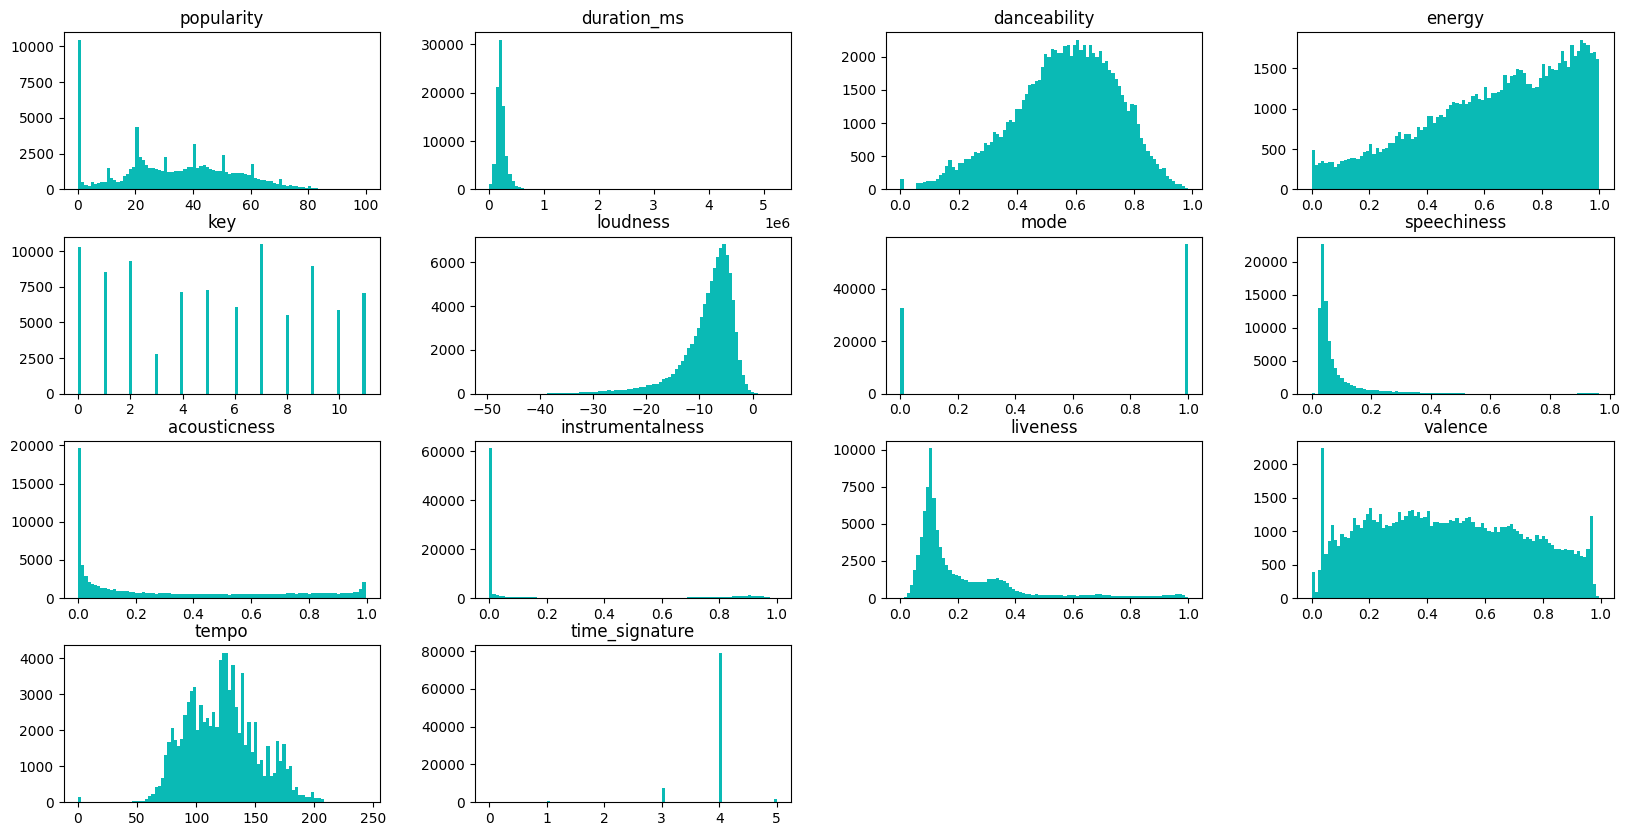

In [ ]:
df.hist(bins=90, grid=False, figsize=(20,10), color= '#0abab5')
plt.show()

Correlation

<ipython-input-63-c0d9bb760bd6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

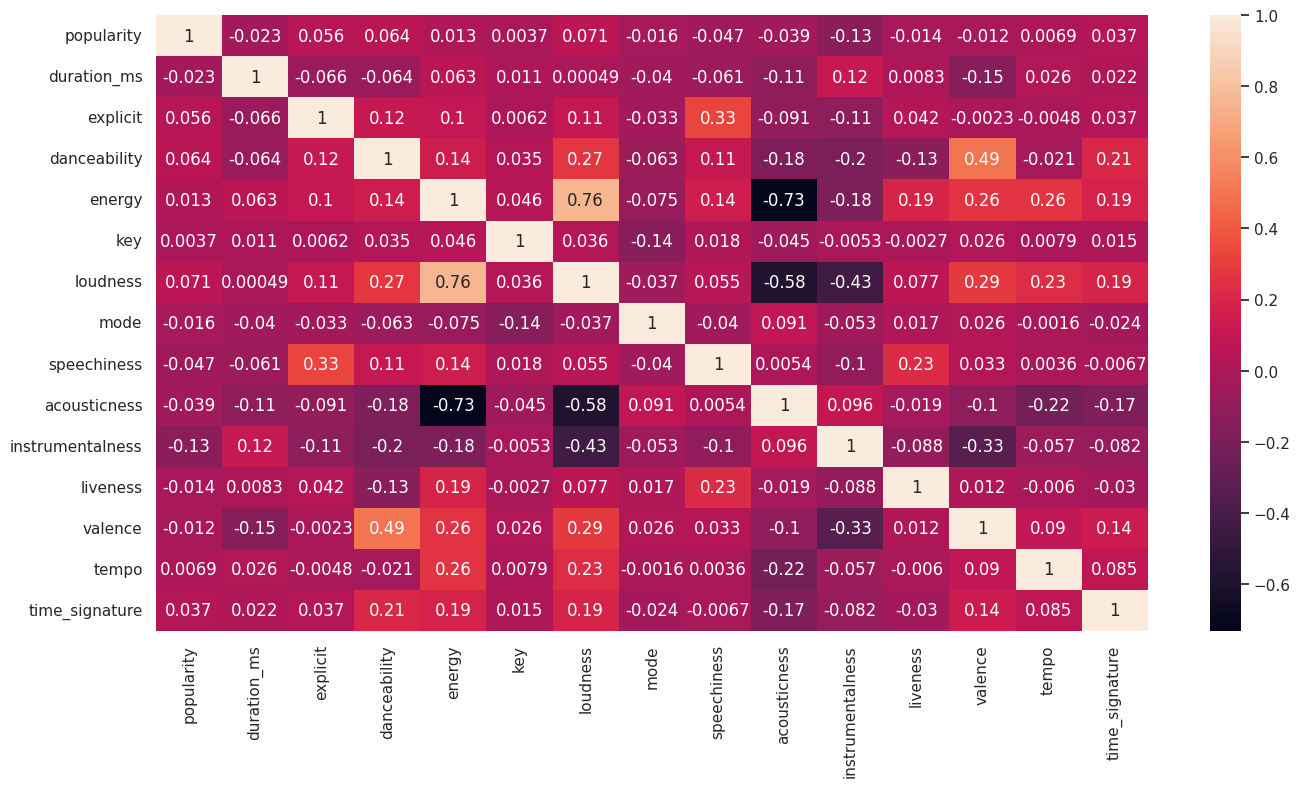

In [ ]:
sns.set(rc = {'figure.figsize':(16, 8)})
sns.heatmap(df.corr(), annot=True)

As the goal is forecast the probability of a song being popular, I split the dataset between populars and unpopulars by being uppopular a song below or equal 49 and popular being above 49.

In [ ]:
df_pop = df.loc[df['popularity'] >49]
df_pop = df_pop.drop(columns = ['union'])
print (df_pop)

                      track_id                                   artists  \
0       5SuOikwiRyPMVoIQDJUgSV                               Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A                              Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b                    Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx                              Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K                          Chord Overstreet   
...                        ...                                       ...   
113872  7xzMrUmlooPa1Fmp88hlYc                             Cesária Evora   
113883  0mhKPUIHNEz4tuWNxNEqCS  Bethel Music;Paul McClure;Hannah McClure   
113929  18q8W11QNDEfhYIxwypTQK                           Rend Collective   
113950  4JDmqxJrJS9FoMPzWmILkQ                             Shane & Shane   
113959  1V0iyVxxWAidx25wcYdzEp                                Housefires   

                                               album_name  \
0                         

<ipython-input-73-8765bc6a6b96>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_pop.corr(), annot=True)


<Axes: >

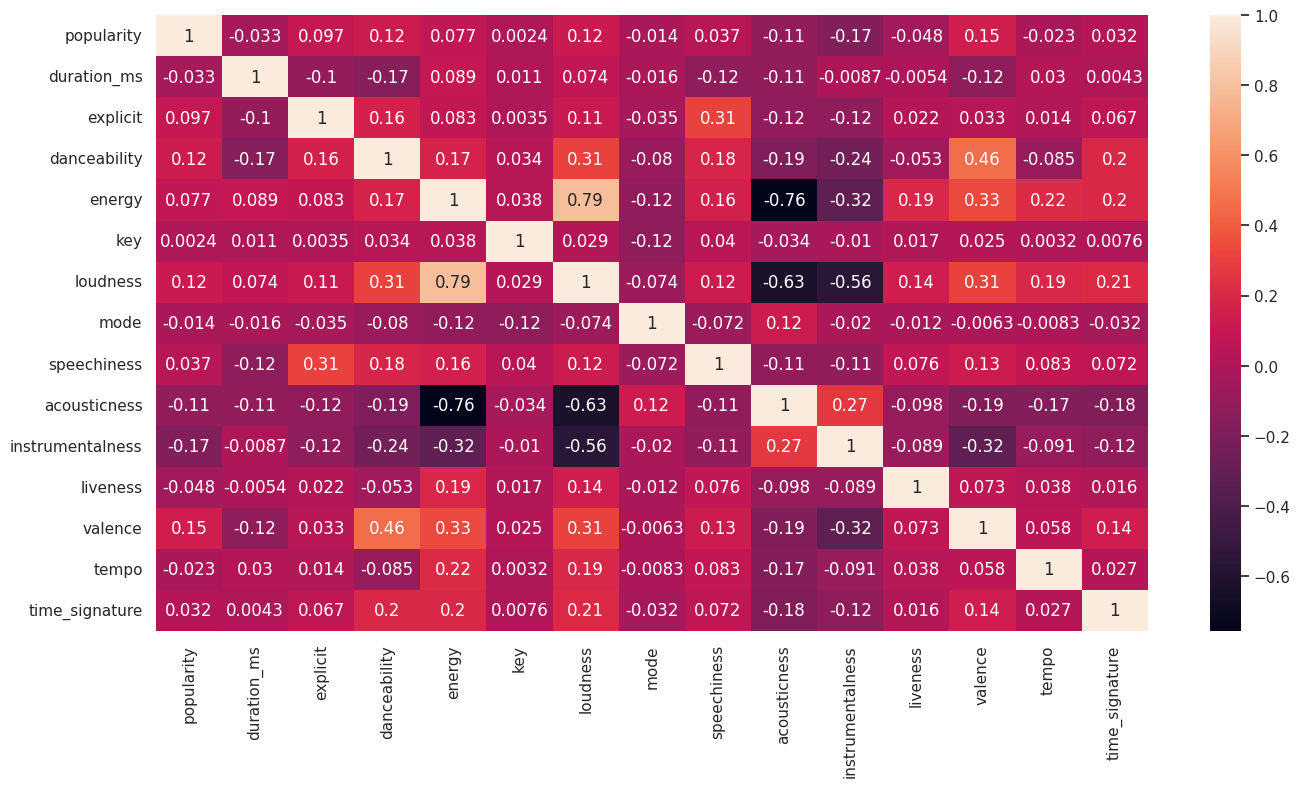

In [ ]:
sns.set(rc = {'figure.figsize':(16, 8)})
sns.heatmap(df_pop.corr(), annot=True)